In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
from tensorflow.keras import datasets

In [2]:
! pip install opendatasets

In [3]:
import opendatasets as od

In [4]:
od.download("https://www.kaggle.com/datasets/bittlingmayer/amazonreviews", data_percent=50)

Skipping, found downloaded files in "./amazonreviews" (use force=True to force download)


In [5]:
import bz2
with bz2.open("/content/amazonreviews/train.ft.txt.bz2", "rt", encoding="utf-8") as f:
    train = pd.read_csv(f, sep="\t", header=None, names=["text"])

In [6]:
with bz2.open("/content/amazonreviews/test.ft.txt.bz2", "rt", encoding="utf-8") as f:
    test = pd.read_csv(f, sep="\t", header=None, names=["text"])

In [7]:
print(train.shape)
print(test.shape)

(3600000, 1)
(400000, 1)


In [8]:
sample_size = int(len(train) * 0.5)
train = train.sample(n=sample_size, random_state=42)

In [9]:
sample_size = int(len(test) * 0.5)
test = test.sample(n=sample_size, random_state=42)

In [10]:
print(train.shape)
print(test.shape)

(1800000, 1)
(200000, 1)


In [11]:
train.head()

,text
2079998,__label__1 Expensive Junk: This product consis...
1443106,__label__1 Toast too dark: Even on the lowest ...
3463669,__label__2 Excellent imagery...dumbed down sto...
2914699,__label__1 Are we pretending everyone is marri...
1603231,__label__1 Not worth your time: Might as well ...


In [12]:
test.head()

,text
23218,__label__2 This is a great book: I must prefac...
20731,__label__1 Huge Disappointment.: As a big time...
39555,__label__2 Wayne is tight but cant hang with T...
147506,__label__2 Excellent: I read this book when I ...
314215,__label__1 Not about Anusara: Although this bo...


In [13]:
### Checking the min max length of my dataframe

min_length_train = train["text"].str.len().min()
max_length_train = train["text"].str.len().max()
mean_train = train["text"].str.len().mean()

min_length_test = test["text"].str.len().min()
max_length_test = test["text"].str.len().max()
mean_test= test["text"].str.len().mean()

print("min_length_train",min_length_train)
print("max_length_train",max_length_train)
print("mean_train",mean_train)
print("min_length_test",min_length_test)
print("max_length_test",max_length_test)
print("mean_test",mean_test)

min_length_train 83
max_length_train 1026
mean_train 442.52510333333333
min_length_test 110
max_length_test 1026
mean_test 442.597775


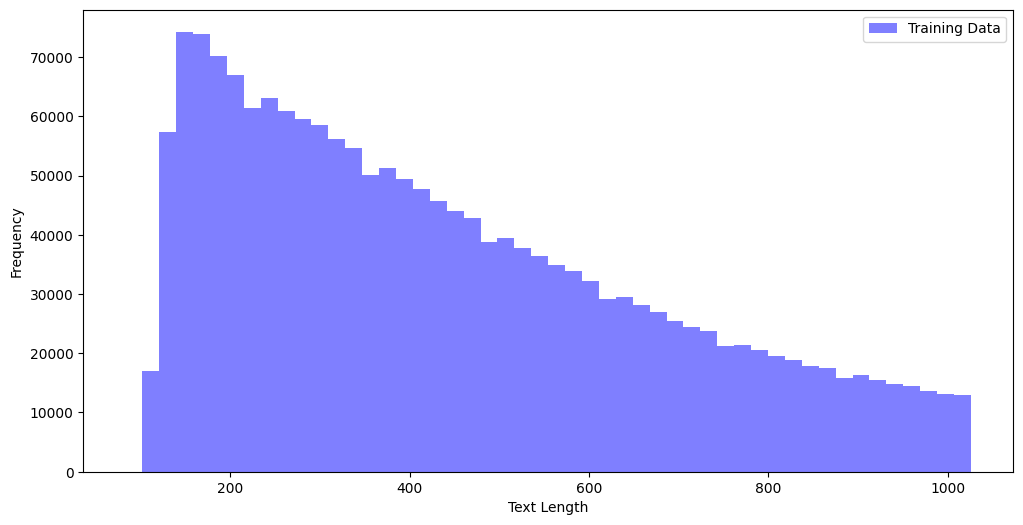

In [14]:
### Checking the graphical view of min, max & mean of the datset

train_lengths = train["text"].str.len()
test_lengths = test["text"].str.len()
plt.figure(figsize=(12, 6))
plt.hist(train_lengths, bins=50, alpha=0.5, label="Training Data", color='blue')
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.legend()
plt.show()

**DUE TO LARGE DATASET AND LIMITED COMPUTATIONAL POWER, SPLITING THE DATASET AND TAKING THE SUBSAMPLES OF A DATASET**

**TAKING RANDOM SAMPLES FROM TRANING AND TESTING DATA WHERE LENGTH IS BETWEEN 100-1000. RANDOM SUBSAMPLING 100000 RECORDS FROM TRANING AND 40000 FROM TESTING **

In [15]:
train_df = train[train["text"].str.len().between(100, 1000)]
test_df = test[test["text"].str.len().between(100, 1000)]


In [16]:
train_df = train_df.sample(n=10000, random_state=42)
test_df = test_df.sample(n=4000, random_state=42)

In [17]:
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

In [18]:
print(train_df.shape)
print(test_df.shape)

(10000, 1)
(4000, 1)


In [19]:
train_df.head()

,text
0,__label__2 A Great New Version of a Wonderful ...
1,__label__2 classic: Classic film that allows n...
2,__label__2 Excellent little pot: I love this l...
3,__label__2 Ginny Owens Presents a New CD of Ol...
4,__label__1 radio reception not good enough: I ...


In [20]:
### Seprating labels and text from traning and testing dataset

train_df[['label', 'text']] = train_df['text'].str.split(' ', 1, expand=True)
test_df[['label', 'text']] = test_df['text'].str.split(' ', 1, expand=True)

In [21]:
train_df['label'] = train_df['label'].str.replace('__label__', '')
train_df['label'] = train_df['label'].str.extract(r'(\d+)')
train_df['label'] = train_df['label'].astype(int)


test_df['label'] = test_df['label'].str.replace('__label__', '')
test_df['label'] = test_df['label'].str.extract(r'(\d+)')
test_df['label'] = test_df['label'].astype(int)

In [22]:
train_df.head()

,text,label
0,A Great New Version of a Wonderful Old Story: ...,2
1,classic: Classic film that allows new generati...,2
2,Excellent little pot: I love this little pot. ...,2
3,Ginny Owens Presents a New CD of Old Favorites...,2
4,radio reception not good enough: I bought this...,1


In [23]:
test_df.head()

,text,label
0,Trivializes and Justifies Racism: This self ag...,1
1,Great birthday gift: I bought the lady bug whe...,2
2,"too flexible: not as good as a blue we have, t...",1
3,Great Sleeves for a Cheap Price!: Bought these...,2
4,Disappointing: This game was developed by the ...,1


In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_df['label'] = le.fit_transform(train_df['label'])
test_df['label'] = le.fit_transform(test_df['label'])

In [25]:
train_df.head()

,text,label
0,A Great New Version of a Wonderful Old Story: ...,1
1,classic: Classic film that allows new generati...,1
2,Excellent little pot: I love this little pot. ...,1
3,Ginny Owens Presents a New CD of Old Favorites...,1
4,radio reception not good enough: I bought this...,0


In [26]:
test_df.head()

,text,label
0,Trivializes and Justifies Racism: This self ag...,0
1,Great birthday gift: I bought the lady bug whe...,1
2,"too flexible: not as good as a blue we have, t...",0
3,Great Sleeves for a Cheap Price!: Bought these...,1
4,Disappointing: This game was developed by the ...,0


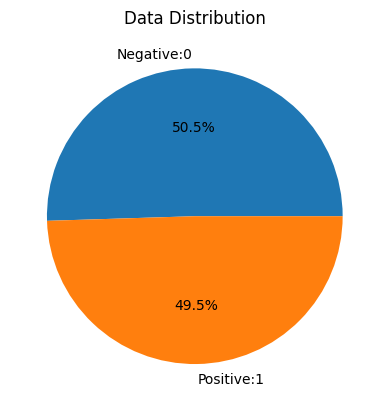

In [27]:
###  Checking the labels distribution in traning data

plt.pie(train_df["label"].value_counts(), labels=["Negative:0", "Positive:1"], autopct='%1.1f%%')
plt.title('Data Distribution')
plt.show()

In [28]:
train_df.isnull().sum()

text     0
label    0
dtype: int64

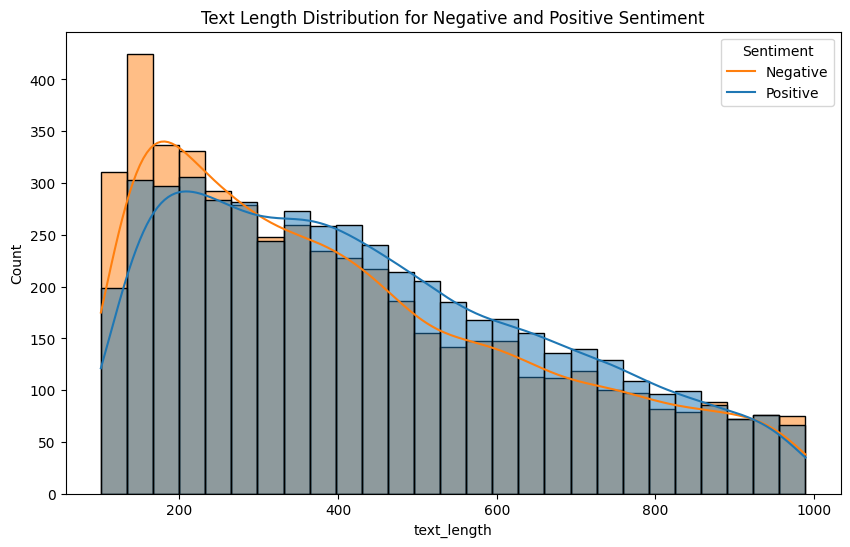

In [29]:
### Checking the length data distribution

train_df["text_length"] = train_df["text"].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(data=train_df, x='text_length', hue='label', kde=True)
plt.title('Text Length Distribution for Negative and Positive Sentiment')
plt.legend(title='Sentiment', labels=['Negative', 'Positive'])
plt.show()

**OBSERVATION == NEGATIVE STAMENTS ARE GENRALLY LONG AS COMPARE TO POSITIVE STATEMENTS**

In [30]:
### Checking the most common words appeared in negarive and positive sentiments

from wordcloud import WordCloud
wc = WordCloud()
wc

In [31]:
positive = wc.generate(train_df[train_df["label"] ==1]["text"].str.cat(sep= "  "))

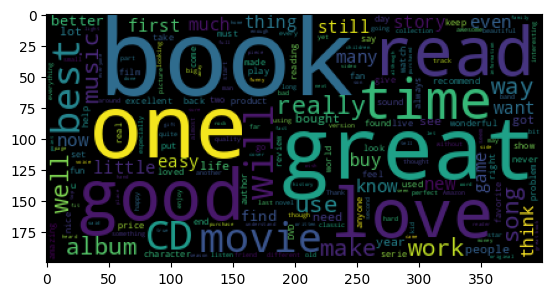

In [32]:
plt.imshow(positive)
plt.show()

In [33]:
negative = wc.generate(train_df[train_df["label"] ==0]["text"].str.cat(sep= "  "))

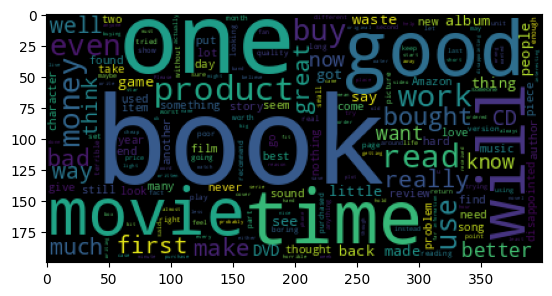

In [34]:
plt.imshow(negative)
plt.show()

**USING DISTILEDBERT MODEL FOR FURTHER PROCESSING**

In [35]:
### Importing & downloading required dependencies

!pip install transformers
from transformers import DistilBertTokenizerFast, TFDistilBertModel

In [36]:
train_texts = train_df['text'].tolist()
train_labels = train_df['label'].tolist()

test_texts = test_df['text'].tolist()
test_labels = test_df['label'].tolist()

In [37]:
### Tokenizing the datasets

tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

train_encodings = tokenizer(train_texts, truncation=True, padding=True, return_tensors='tf')
test_encodings = tokenizer(test_texts, truncation=True, padding=True, return_tensors='tf')


In [38]:
### Converting tokenize data into numpy arrays

train_input_ids = np.array(train_encodings['input_ids'])
train_attention_mask = np.array(train_encodings['attention_mask'])
train_labels = np.array(train_labels)

test_input_ids = np.array(test_encodings['input_ids'])
test_attention_mask = np.array(test_encodings['attention_mask'])
test_labels = np.array(test_labels)


In [39]:
train_input_ids

array([[  101,  1037,  2307, ...,     0,     0,     0],
       [  101,  4438,  1024, ...,     0,     0,     0],
       [  101,  6581,  2210, ...,     0,     0,     0],
       ...,
       [  101,  2307,  2034, ...,     0,     0,     0],
       [  101, 15357,  3714, ...,     0,     0,     0],
       [  101, 13044,  1024, ...,     0,     0,     0]], dtype=int32)

In [40]:
train_attention_mask

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=int32)

In [41]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels, num_classes=2)
test_labels = to_categorical(test_labels, num_classes=2)

In [42]:
### Checking the shape of data before further processing

print("Train input_ids shape:", train_input_ids.shape)
print("Train attention_mask shape:", train_attention_mask.shape)
print("Train labels shape:", train_labels.shape)

print("Test input_ids shape:", test_input_ids.shape)
print("Test attention_mask shape:", test_attention_mask.shape)
print("Test labels shape:", test_labels.shape)


Train input_ids shape: (10000, 326)
Train attention_mask shape: (10000, 326)
Train labels shape: (10000, 2)
Test input_ids shape: (4000, 287)
Test attention_mask shape: (4000, 287)
Test labels shape: (4000, 2)


In [43]:
### Model Building

from transformers import TFDistilBertForSequenceClassification
distilbert_model = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=2)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_projector.bias', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_transform.weight', 'vocab_layer_norm.bias']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

In [44]:
distilbert_model = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=2)


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_projector.bias', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_transform.weight', 'vocab_layer_norm.bias']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

In [46]:
from tensorflow.keras.layers import Input, Dense, Flatten

max_train_length = max(train_input_ids.shape[1], train_attention_mask.shape[1])
train_input_ids = np.expand_dims(train_input_ids, axis=-1)
train_attention_mask = np.expand_dims(train_attention_mask, axis=-1)
test_input_ids = np.expand_dims(test_input_ids, axis=-1)
test_attention_mask = np.expand_dims(test_attention_mask, axis=-1)

train_labels = np.argmax(train_labels, axis=1)
test_labels = np.argmax(test_labels, axis=1)

max_train_length = max(train_input_ids.shape[1], train_attention_mask.shape[1])
max_test_length = max(test_input_ids.shape[1], test_attention_mask.shape[1])
max_length = max(max_train_length, max_test_length)

input_ids = Input(shape=(max_length,), dtype='int32')
attention_mask = Input(shape=(max_length,), dtype='int32')

outputs = distilbert_model(input_ids, attention_mask=attention_mask)

flatten_output = Flatten()(outputs[0])

output = Dense(units=1, activation='sigmoid')(flatten_output)
model = tf.keras.Model(inputs=[input_ids, attention_mask], outputs=output)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

for layer in distilbert_model.layers[:-4]:
    layer.trainable = False


model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 326)]        0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 326)]        0           []                               
                                                                                                  
 tf_distil_bert_for_sequence_cl  TFSequenceClassifie  66955010   ['input_1[0][0]',                
 assification_1 (TFDistilBertFo  rOutput(loss=None,               'input_2[0][0]']                
 rSequenceClassification)       logits=(None, 2),                                                 
                                 hidden_states=None                                           

In [ ]:
model.fit(
    [train_input_ids, train_attention_mask],
    train_labels,
    epochs=5,
    batch_size=8,
    validation_data=([test_input_ids, test_attention_mask], test_labels)
)

Epoch 1/5
  34/1250 [..............................] - ETA: 6:11:58 - loss: 0.7363 - accuracy: 0.5147